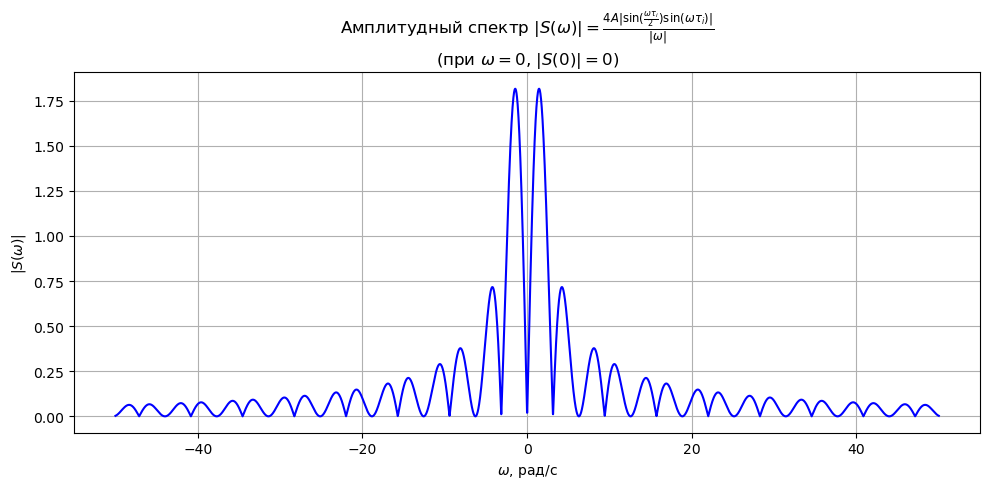

In [6]:
import numpy as np
import matplotlib.pyplot as plt

A = 1.0         
tau_i = 1.0      

omega = np.linspace(-50, 50, 5000)

S_abs = np.zeros_like(omega)
nonzero = omega != 0
S_abs[nonzero] = 4 * A * np.abs(
    np.sin(omega[nonzero] * tau_i / 2) * np.sin(omega[nonzero] * tau_i)
) / np.abs(omega[nonzero])

plt.figure(figsize=(10, 5))
plt.plot(omega, S_abs, color='blue')
plt.title(r'Амплитудный спектр $|S(\omega)| = \frac{4A|\sin(\frac{\omega\tau_i}{2})\sin(\omega\tau_i)|}{|\omega|}$' + '\n' +
          r'(при $\omega=0$, $|S(0)|=0$)')
plt.xlabel(r'$\omega$, рад/с')
plt.ylabel(r'$|S(\omega)|$')
plt.grid(True)
plt.tight_layout()
plt.show()

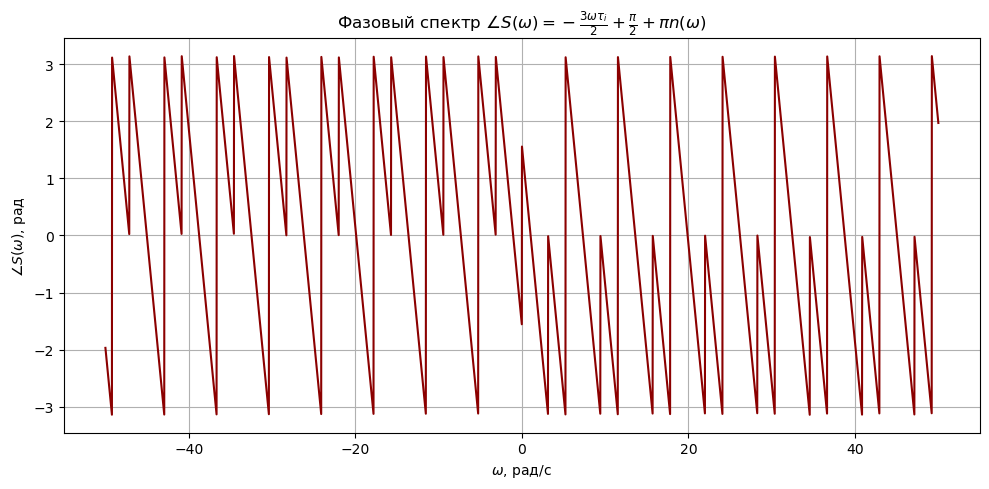

In [8]:
import numpy as np
import matplotlib.pyplot as plt

A = 1.0
tau_i = 1.0

omega = np.linspace(-50, 50, 5000)

expr = np.sin(omega * tau_i / 2) * np.sin(omega * tau_i) / np.where(omega == 0, 1, omega)

n = np.zeros_like(omega)
n[expr < 0] = 1

phi = -1.5 * omega * tau_i + np.pi / 2 + np.pi * n

phi = (phi + np.pi) % (2 * np.pi) - np.pi

plt.figure(figsize=(10, 5))
plt.plot(omega, phi, color='darkred')
plt.title(r'Фазовый спектр $\angle S(\omega) = -\frac{3\omega\tau_i}{2} + \frac{\pi}{2} + \pi n(\omega)$')
plt.xlabel(r'$\omega$, рад/с')
plt.ylabel(r'$\angle S(\omega)$, рад')
plt.grid(True)
plt.tight_layout()
plt.show()

tau_cor (numeric) = 0.1350949115234154  (theory 4T/(3pi^2) =  0.13509491152311703 )
tau_cor_eps (eps=1/e) = 0.20016324483051218  (в долях T: ) 0.20016324483051218


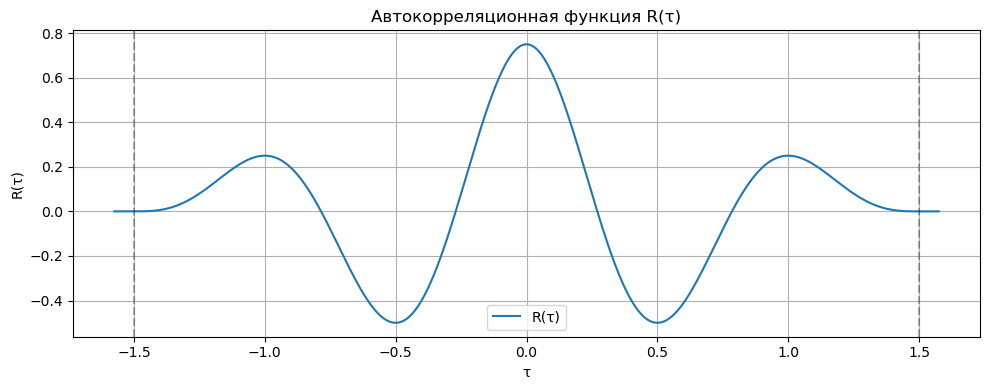

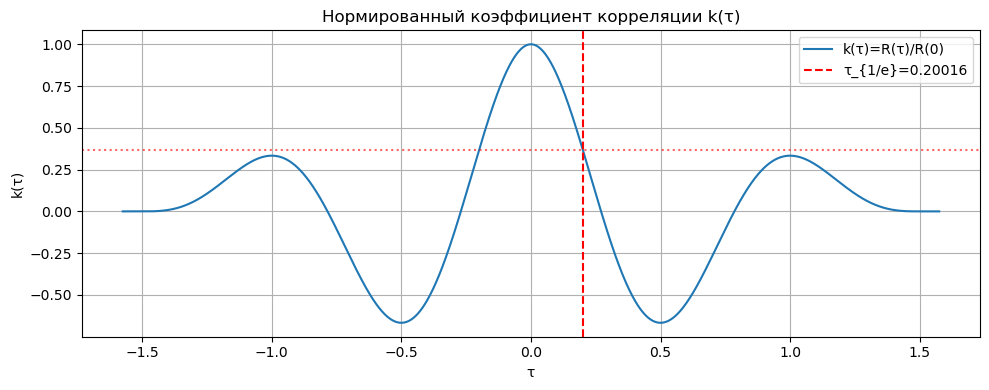

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import brentq

# параметры (можете менять)
A = 1.0
T = 1.0
omega0 = 2*math.pi / T
L = 1.5 * T
R0 = 3 * A**2 * T / 4

def R_of_tau(tau):
    if abs(tau) > L:
        return 0.0
    if tau >= 0:
        return 0.5*A**2 * ((L - tau)*math.cos(omega0*tau) + math.sin(omega0*tau)/omega0)
    else:
        return 0.5*A**2 * ((L + tau)*math.cos(omega0*tau) - math.sin(omega0*tau)/omega0)

# сетка для графика
taus = np.linspace(-L*1.05, L*1.05, 2001)
R_vals = np.array([R_of_tau(t) for t in taus])
k_vals = R_vals / R0

# численный интеграл для tau_cor
tau_cor_numeric = np.trapz(k_vals, taus)
print("tau_cor (numeric) =", tau_cor_numeric, " (theory 4T/(3pi^2) = ", 4*T/(3*math.pi**2), ")")

# найти tau where k(tau) = 1/e (первое положительное решение)
eps = 1/math.e
# сначала ищем интервал где k crosses eps on positive side
ts_pos = np.linspace(0, L, 2001)
ks_pos = np.array([R_of_tau(t)/R0 for t in ts_pos])
# предполагаем, что k(0)=1 и убывает, ищем первое пересечение
idx = np.where(ks_pos <= eps)[0][0]
tau_left = ts_pos[idx-1]
tau_right = ts_pos[idx]
# используем brentq для точного корня функции f(t)=k(t)-eps
f = lambda x: (R_of_tau(x)/R0) - eps
tau_eps = brentq(f, tau_left, tau_right)
print("tau_cor_eps (eps=1/e) =", tau_eps, " (в долях T: )", tau_eps / T)

# построение
plt.figure(figsize=(10,4))
plt.plot(taus, R_vals, label='R(τ)')
plt.axvline(-L, color='k', linestyle='--', alpha=0.3)
plt.axvline(L, color='k', linestyle='--', alpha=0.3)
plt.title("Автокорреляционная функция R(τ)")
plt.xlabel("τ")
plt.ylabel("R(τ)")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.figure(figsize=(10,4))
plt.plot(taus, k_vals, label='k(τ)=R(τ)/R(0)')
plt.axvline(tau_eps, color='r', linestyle='--', label=f"τ_{{1/e}}={tau_eps:.5f}")
plt.axhline(1/math.e, color='r', alpha=0.6, linestyle=':')
plt.title("Нормированный коэффициент корреляции k(τ)")
plt.xlabel("τ")
plt.ylabel("k(τ)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


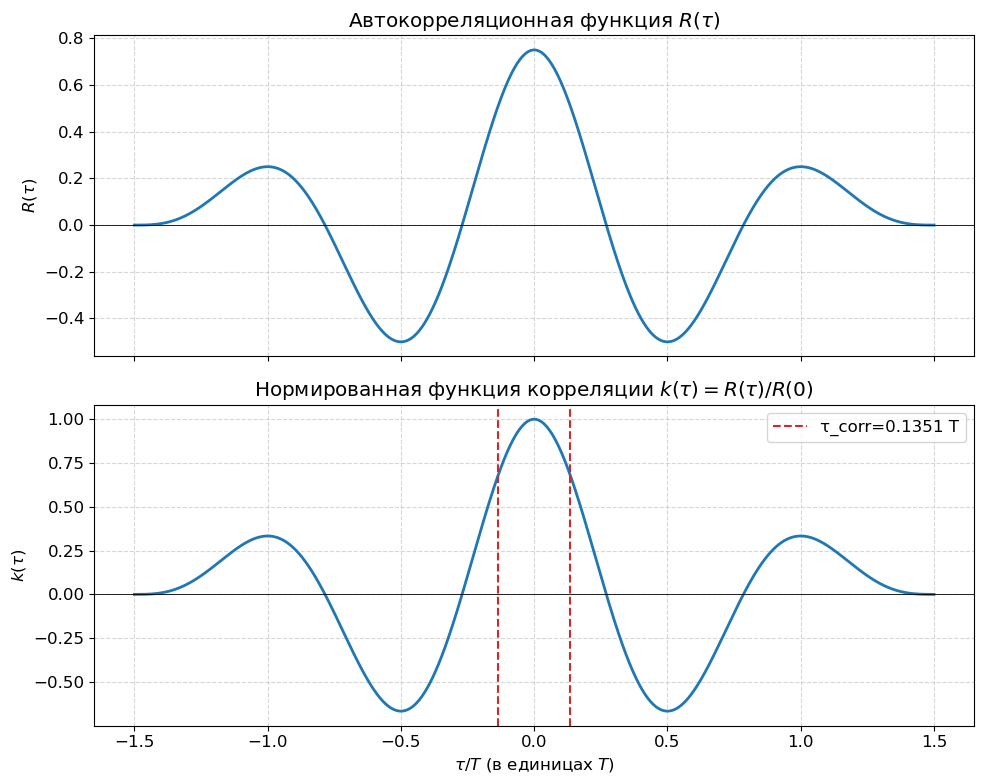

T = 1.0, L = 1.5
omega0 = 6.283185
R(0) = 0.750000
Интегральное время корреляции (численно): τ_corr = 0.135095 * T


In [6]:
# -*- coding: utf-8 -*-
"""
Построение АКФ R(τ) и нормированного коэффициента корреляции k(τ)
для сигнала s(t) = A*sin(2π t / T) на отрезке [0, L], L = 3T/2.
"""
import numpy as np
import matplotlib.pyplot as plt

# ----------------- параметры -----------------
A = 1.0        # амплитуда
T = 1.0        # базовый период (врем. единицы)
omega0 = 2 * np.pi / T
L = 3 * T / 2  # длина непериодического отрезка

# ----------------- аналитическая АКФ ---------------
def R_tau(tau):
    """
    Возвращает R(τ) для скалярного или векторного tau.
    Формула: для |τ| <= L
    R(τ) = (A^2/2) * ( (L - |τ|) cos(ω0 τ) + sgn(τ) * sin(ω0 τ)/ω0 )
    иначе R(τ) = 0
    """
    tau = np.array(tau, dtype=float)
    R = np.zeros_like(tau)
    mask = np.abs(tau) <= L
    if np.any(mask):
        t = tau[mask]
        # вычисляем аналитически
        R_val = (A**2 / 2.0) * (((L - np.abs(t)) * np.cos(omega0 * t)
                                 + np.sign(t) * (np.sin(omega0 * t) / omega0)))
        R[mask] = R_val
    return R

# ----------------- нормированная функция корреляции ---------------
R0 = A**2 * L / 2.0  # R(0)
def k_tau(tau):
    return R_tau(tau) / R0

# ----------------- сетка для графиков -----------------
N = 4001
taus = np.linspace(-L, L, N)   # берем от -L до L (за пределами AKF = 0)
R_vals = R_tau(taus)
k_vals = k_tau(taus)

# ----------------- численные дополнительные величины (опционально) ---------------
tau_corr_num = np.trapz(k_vals, taus)  # интегральный интервал корреляции

# ----------------- построение графиков -----------------
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# R(τ)
axs[0].plot(taus / T, R_vals, linewidth=2)
axs[0].axhline(0, color='k', linewidth=0.6)
axs[0].set_ylabel(r'$R(\tau)$')
axs[0].set_title('Автокорреляционная функция $R(\\tau)$')
axs[0].grid(True, linestyle='--', alpha=0.5)

# k(τ)
axs[1].plot(taus / T, k_vals, linewidth=2)
axs[1].axhline(0, color='k', linewidth=0.6)
axs[1].set_xlabel(r'$\tau/T$ (в единицах $T$)')
axs[1].set_ylabel(r'$k(\tau)$')
axs[1].set_title('Нормированная функция корреляции $k(\\tau)=R(\\tau)/R(0)$')
axs[1].grid(True, linestyle='--', alpha=0.5)

# отмечаем интегральное время корреляции (по модулю; две вертикали)
axs[1].axvline(tau_corr_num / T, color='C3', linestyle='--', label=f'τ_corr={tau_corr_num:.4f} T')
axs[1].axvline(-tau_corr_num / T, color='C3', linestyle='--')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

# -------------- печать ключевых значений --------------
print(f"T = {T}, L = {L}")
print(f"omega0 = {omega0:.6f}")
print(f"R(0) = {R0:.6f}")
print(f"Интегральное время корреляции (численно): τ_corr = {tau_corr_num:.6f} * T")
